Importing the necessary packages.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import PercentFormatter
from scipy.stats import zscore

Reading the file

In [2]:
df=pd.read_csv(r"C:\Users\suhas\OneDrive\Documents\universal_top_spotify_songs.csv",encoding="unicode_escape")
df


,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,7gaA3wERFkFkgivjwbSvkG,"yes, and?",Ariana Grande,1,0,49,NaN,2024-01-16,89,True,...,1,-6.513,1,0.0505,0.1980,0.000085,0.104,0.823,119.008,4
1,0R6NfOiLzLj4O5VbYSJAjf,La Diabla,Xavi,2,0,-1,NaN,2024-01-16,97,False,...,11,-4.372,0,0.0409,0.2550,0.000000,0.236,0.697,131.842,3
2,3rUGC1vUpkDG9CZFHMur1t,greedy,Tate McRae,3,0,-1,NaN,2024-01-16,100,True,...,6,-3.180,0,0.0319,0.2560,0.000000,0.114,0.844,111.018,1
3,3vkCueOmm7xQDoJ17W1Pm3,My Love Mine All Mine,Mitski,4,3,1,NaN,2024-01-16,98,False,...,9,-14.958,1,0.0321,0.8680,0.135000,0.158,0.121,113.950,4
4,7CyPwkp0oE8Ro9Dd5CUDjW,"One Of The Girls (with JENNIE, Lily Rose Depp)","The Weeknd, JENNIE, Lily-Rose Depp",5,1,1,NaN,2024-01-16,97,False,...,8,-6.287,1,0.0318,0.0545,0.000000,0.162,0.202,87.510,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331611,0AYt6NMyyLd0rLuvr0UkMH,Slime You Out (feat. SZA),"Drake, SZA",46,4,0,AE,2023-10-18,84,True,...,5,-9.243,0,0.0502,0.5080,0.000000,0.259,0.105,88.880,3
331612,2Gk6fi0dqt91NKvlzGsmm7,SAY MY GRACE (feat. Travis Scott),"Offset, Travis Scott",47,3,0,AE,2023-10-18,80,True,...,10,-5.060,1,0.0452,0.0585,0.000000,0.132,0.476,121.879,4
331613,26b3oVLrRUaaybJulow9kz,People,Libianca,48,2,0,AE,2023-10-18,88,False,...,10,-7.621,0,0.0678,0.5510,0.000013,0.102,0.693,124.357,5
331614,5ydjxBSUIDn26MFzU3asP4,Rainy Days,V,49,1,0,AE,2023-10-18,88,False,...,9,-8.016,0,0.0875,0.7390,0.000000,0.148,0.282,74.828,4


In [3]:
df

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,7gaA3wERFkFkgivjwbSvkG,"yes, and?",Ariana Grande,1,0,49,NaN,2024-01-16,89,True,...,1,-6.513,1,0.0505,0.1980,0.000085,0.104,0.823,119.008,4
1,0R6NfOiLzLj4O5VbYSJAjf,La Diabla,Xavi,2,0,-1,NaN,2024-01-16,97,False,...,11,-4.372,0,0.0409,0.2550,0.000000,0.236,0.697,131.842,3
2,3rUGC1vUpkDG9CZFHMur1t,greedy,Tate McRae,3,0,-1,NaN,2024-01-16,100,True,...,6,-3.180,0,0.0319,0.2560,0.000000,0.114,0.844,111.018,1
3,3vkCueOmm7xQDoJ17W1Pm3,My Love Mine All Mine,Mitski,4,3,1,NaN,2024-01-16,98,False,...,9,-14.958,1,0.0321,0.8680,0.135000,0.158,0.121,113.950,4
4,7CyPwkp0oE8Ro9Dd5CUDjW,"One Of The Girls (with JENNIE, Lily Rose Depp)","The Weeknd, JENNIE, Lily-Rose Depp",5,1,1,NaN,2024-01-16,97,False,...,8,-6.287,1,0.0318,0.0545,0.000000,0.162,0.202,87.510,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331611,0AYt6NMyyLd0rLuvr0UkMH,Slime You Out (feat. SZA),"Drake, SZA",46,4,0,AE,2023-10-18,84,True,...,5,-9.243,0,0.0502,0.5080,0.000000,0.259,0.105,88.880,3
331612,2Gk6fi0dqt91NKvlzGsmm7,SAY MY GRACE (feat. Travis Scott),"Offset, Travis Scott",47,3,0,AE,2023-10-18,80,True,...,10,-5.060,1,0.0452,0.0585,0.000000,0.132,0.476,121.879,4
331613,26b3oVLrRUaaybJulow9kz,People,Libianca,48,2,0,AE,2023-10-18,88,False,...,10,-7.621,0,0.0678,0.5510,0.000013,0.102,0.693,124.357,5
331614,5ydjxBSUIDn26MFzU3asP4,Rainy Days,V,49,1,0,AE,2023-10-18,88,False,...,9,-8.016,0,0.0875,0.7390,0.000000,0.148,0.282,74.828,4


In [4]:
for col in df.columns:
    print(col)

spotify_id
name
artists
daily_rank
daily_movement
weekly_movement
country
snapshot_date
popularity
is_explicit
duration_ms
album_name
album_release_date
danceability
energy
key
loudness
mode
speechiness
acousticness
instrumentalness
liveness
valence
tempo
time_signature


Basic Information:
>spotify_id: Unique identifier for each track on Spotify.

>name: Name of the track.

>artists: Artists associated with the track.
    
Track Metrics:
>daily_rank: Daily rank of the track.

>daily_movement: Daily movement in rank.

>weekly_movement: Weekly movement in rank.

>country: Country associated with the data snapshot.

>snapshot_date: Date when the data snapshot was taken or origin of artists.

>popularity: Popularity score of the track.

>is_explicit: Boolean indicating whether the track has explicit content.

>duration_ms: Duration of the track in milliseconds.
    
Album Information:
>album_name: Name of the album to which the track belongs.

>album_release_date: Release date of the album.
    
Audio Features:

>danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature: Various audio features representing the musical characteristics of the track.

DATA CLEANING

In [5]:
#missing data
missing_values=df.isnull().sum().sort_values(ascending=False)
missing_values#calculating the missing values from highest number to lowest number

country               4506
album_release_date     186
album_name             186
artists                 22
name                    22
key                      0
tempo                    0
valence                  0
liveness                 0
instrumentalness         0
acousticness             0
speechiness              0
mode                     0
loudness                 0
spotify_id               0
energy                   0
danceability             0
duration_ms              0
is_explicit              0
popularity               0
snapshot_date            0
weekly_movement          0
daily_movement           0
daily_rank               0
time_signature           0
dtype: int64

In [6]:
percent_missing_values=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
percent_missing_values#finding missing values percentage

country               0.013588
album_release_date    0.000561
album_name            0.000561
artists               0.000066
name                  0.000066
key                   0.000000
tempo                 0.000000
valence               0.000000
liveness              0.000000
instrumentalness      0.000000
acousticness          0.000000
speechiness           0.000000
mode                  0.000000
loudness              0.000000
spotify_id            0.000000
energy                0.000000
danceability          0.000000
duration_ms           0.000000
is_explicit           0.000000
popularity            0.000000
snapshot_date         0.000000
weekly_movement       0.000000
daily_movement        0.000000
daily_rank            0.000000
time_signature        0.000000
dtype: float64

In [7]:
missing_data=pd.concat([missing_values,percent_missing_values],axis=1, keys=['missing_values','percent_missing_values'])
missing_data.head(20)# creating a seprate data frame for missing value and its corresponding percentage it contributes.

,missing_values,percent_missing_values
country,4506,0.013588
album_release_date,186,0.000561
album_name,186,0.000561
artists,22,0.000066
name,22,0.000066
key,0,0.000000
tempo,0,0.000000
valence,0,0.000000
liveness,0,0.000000
instrumentalness,0,0.000000


Dealing with missing values ,there are two ways
.To drop
.to fill



How do we decide?
if the data is missing above 15 percent we are going to drop and pretend it never exit(my assumption)

In [8]:
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['album_release_date'].fillna('unknown_album_release_date', inplace=True)
df['album_name'].fillna('Unknown Album', inplace=True)
df['artists'].fillna('Unknown Artist', inplace=True)
df['name'].fillna('Unknown Song', inplace=True)
df.isnull().sum()


spotify_id            0
name                  0
artists               0
daily_rank            0
daily_movement        0
weekly_movement       0
country               0
snapshot_date         0
popularity            0
is_explicit           0
duration_ms           0
album_name            0
album_release_date    0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
dtype: int64

Finding Skewnwss and kurtosis for all columns

In [9]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate skewness for each numerical column
skewness_values = df[numeric_columns].skew()

# Display skewness values
print('The skewness values are:',skewness_values)

# Calculate kurtosis for each numerical column
kurtosis_values = df[numeric_columns].kurt()

# Display Kurtosis values
print('\n The Kurtosis values are:',kurtosis_values)

The skewness values are: daily_rank          0.001535
daily_movement      2.625790
weekly_movement     1.352610
popularity         -1.274780
duration_ms         1.655872
danceability       -0.523472
energy             -0.581423
key                -0.002147
loudness           -1.149376
mode               -0.112513
speechiness         2.053951
acousticness        0.873492
instrumentalness    7.121230
liveness            2.167396
valence            -0.014336
tempo               0.475976
time_signature     -4.329545
dtype: float64

 The Kurtosis values are: daily_rank          -1.200047
daily_movement      14.997470
weekly_movement      2.491865
popularity           2.836682
duration_ms          8.462110
danceability        -0.131769
energy               0.281011
key                 -1.237059
loudness             2.741709
mode                -1.987353
speechiness          4.458034
acousticness        -0.362566
instrumentalness    55.433723
liveness             5.959336
valence             

Observation:
    
Based on your skewness values:

>Positive skewness in daily_movement, weekly_movement, speechiness, liveness, instrumentalness indicates a right-skewed distribution.

>Negative skewness in popularity, loudness, time_signature indicates a left-skewed distribution.

>Other variables have skewness values close to zero, suggesting relatively symmetric distributions.

Based on your kurtosis values:

>High positive kurtosis in daily_movement, popularity, duration_ms, danceability, key, mode, speechiness, acousticness, liveness, tempo, time_signature indicates heavier tails, suggesting the presence of outliers.

>instrumentalness has extremely high positive kurtosis, indicating a distribution with very heavy tails and potentially extreme outliers.

Box plot

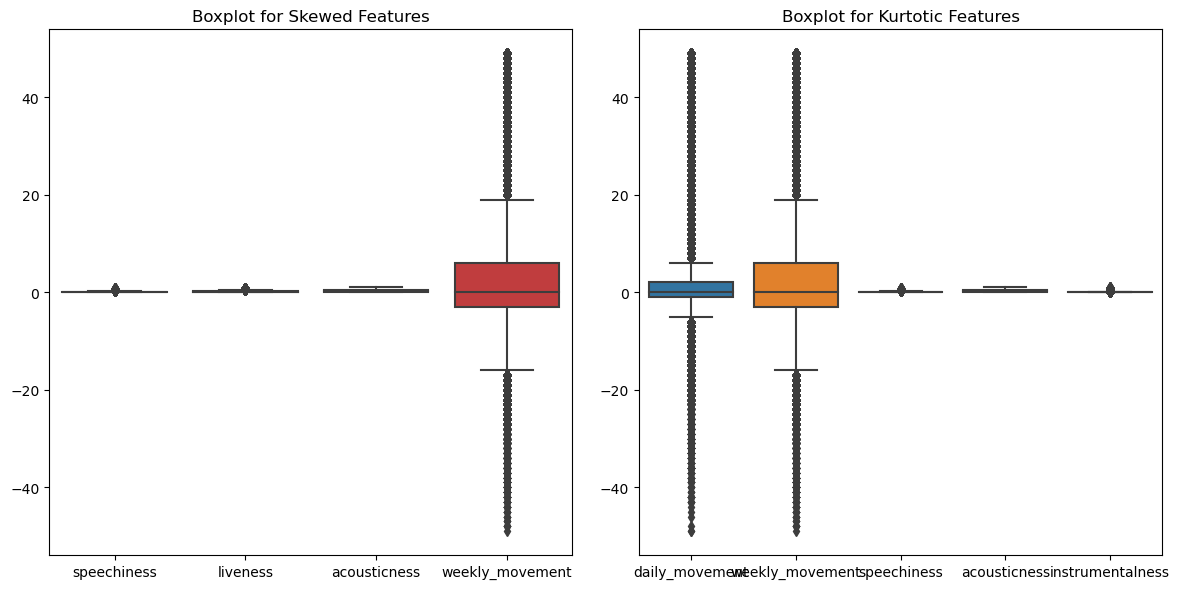

In [10]:
# Features with higher skewness
skewed_features = ['speechiness', 'liveness', 'acousticness', 'weekly_movement']

# Features with higher kurtosis
kurtotic_features = ['daily_movement', 'weekly_movement', 'speechiness', 'acousticness', 'instrumentalness']

# Boxplot for skewed features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df[skewed_features])
plt.title('Boxplot for Skewed Features')

# Boxplot for kurtotic features
plt.subplot(1, 2, 2)
sns.boxplot(data=df[kurtotic_features])
plt.title('Boxplot for Kurtotic Features')

plt.tight_layout()
plt.show()


Detecting the outliers

In [11]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate z-scores
z_scores = zscore(df[numeric_columns])
z_scores


,daily_rank,daily_movement,weekly_movement,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,-1.696924,-0.124859,3.531208,0.717950,0.420976,0.759009,0.702042,-1.263050,0.068403,0.945325,-0.515474,-0.377614,-0.188762,-0.556340,1.216888,-0.117513,0.240587
1,-1.627605,-0.124859,-0.366847,1.218514,-0.440308,0.501830,1.067701,1.613044,0.843097,-1.057837,-0.617518,-0.161195,-0.189709,0.476664,0.668859,0.328368,-2.013727
2,-1.558285,-0.124859,-0.366847,1.406226,-1.254466,0.494879,0.552181,0.174997,1.274407,-1.057837,-0.713183,-0.157398,-0.189709,-0.478082,1.308227,-0.395102,-6.522353
3,-1.488965,0.306100,-0.210925,1.281084,-1.135523,-1.215013,-1.995444,1.037825,-2.987314,0.945325,-0.711057,2.166259,1.314705,-0.133748,-1.836420,-0.293238,0.240587
4,-1.419646,0.018794,-0.210925,1.218514,1.019421,-1.089899,0.000695,0.750216,0.150178,0.945325,-0.714246,-0.922458,-0.189709,-0.102445,-1.484115,-1.211820,0.240587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331611,1.422459,0.449752,-0.288886,0.405097,2.345835,-1.360980,-1.396003,-0.112612,-0.919413,-1.057837,-0.518663,0.799402,-0.189709,0.656657,-1.906011,-1.164223,-2.013727
331612,1.491778,0.306100,-0.288886,0.154815,-0.420373,0.654747,-0.035271,1.325435,0.594153,0.945325,-0.571811,-0.907271,-0.189709,-0.337218,-0.292368,-0.017768,0.240587
331613,1.561098,0.162447,-0.288886,0.655379,-0.187808,-0.735409,-1.312081,1.325435,-0.332513,-1.057837,-0.331584,0.962665,-0.189563,-0.571992,0.651461,0.068323,2.494900
331614,1.630418,0.018794,-0.288886,0.655379,-0.293247,-0.318362,-1.120260,1.037825,-0.475438,-1.057837,-0.122182,1.676468,-0.189709,-0.212006,-1.136160,-1.652420,0.240587



In the context of the z-score approach used to identify outliers, observations are considered outliers if their z-score exceeds a certain threshold. Typically, a common threshold is set at 3, meaning that any observation with an absolute z-score greater than 3 is considered an outlier.

Removing the outliers

In [12]:
from scipy.stats import zscore

# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate z-scores
z_scores = zscore(df[numeric_columns])

# Identify outliers
outliers = (abs(z_scores) > 3).any(axis=1)

# Remove outliers
df_no_outliers = df[~outliers]
df1=df_no_outliers
df1


,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
1,0R6NfOiLzLj4O5VbYSJAjf,La Diabla,Xavi,2,0,-1,LV,2024-01-16,97,False,...,11,-4.372,0,0.0409,0.2550,0.000000,0.2360,0.697,131.842,3
3,3vkCueOmm7xQDoJ17W1Pm3,My Love Mine All Mine,Mitski,4,3,1,LV,2024-01-16,98,False,...,9,-14.958,1,0.0321,0.8680,0.135000,0.1580,0.121,113.950,4
4,7CyPwkp0oE8Ro9Dd5CUDjW,"One Of The Girls (with JENNIE, Lily Rose Depp)","The Weeknd, JENNIE, Lily-Rose Depp",5,1,1,LV,2024-01-16,97,False,...,8,-6.287,1,0.0318,0.0545,0.000000,0.1620,0.202,87.510,4
5,4xhsWYTOGcal8zt0J161CU,Lovin On Me,Jack Harlow,6,-2,-3,LV,2024-01-16,99,True,...,2,-4.911,1,0.0568,0.0026,0.000002,0.0937,0.606,104.983,4
6,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,Taylor Swift,7,-2,-3,LV,2024-01-16,99,False,...,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331611,0AYt6NMyyLd0rLuvr0UkMH,Slime You Out (feat. SZA),"Drake, SZA",46,4,0,AE,2023-10-18,84,True,...,5,-9.243,0,0.0502,0.5080,0.000000,0.2590,0.105,88.880,3
331612,2Gk6fi0dqt91NKvlzGsmm7,SAY MY GRACE (feat. Travis Scott),"Offset, Travis Scott",47,3,0,AE,2023-10-18,80,True,...,10,-5.060,1,0.0452,0.0585,0.000000,0.1320,0.476,121.879,4
331613,26b3oVLrRUaaybJulow9kz,People,Libianca,48,2,0,AE,2023-10-18,88,False,...,10,-7.621,0,0.0678,0.5510,0.000013,0.1020,0.693,124.357,5
331614,5ydjxBSUIDn26MFzU3asP4,Rainy Days,V,49,1,0,AE,2023-10-18,88,False,...,9,-8.016,0,0.0875,0.7390,0.000000,0.1480,0.282,74.828,4


Descriptive statstics summary

Correlation Test:

In [327]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(df1['danceability'], df1['energy'])
print(f'Pearson Correlation: {correlation}, p-value: {p_value}')


Pearson Correlation: 0.2516332048182567, p-value: 0.0


Chi-Square Test:

In [328]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df1['is_explicit'], df1['popularity'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-Square: Chi2-statistic: {chi2_stat}, p-value: {p_value}')


Chi-Square: Chi2-statistic: 17001.96997834871, p-value: 0.0


Pearson Correlation:

>The correlation coefficient of 0.2516 indicates a positive correlation between the variables being tested.

>The p-value of 0.0 suggests that the correlation is statistically significant.


Chi-Square:

>The Chi2-statistic of 17001.97 indicates a significant association between categorical variables in a contingency table.

>The p-value of 0.0 suggests that the association is statistically significant.

Describe statistics for numeric columns

In [329]:
numeric_columns = ['key', 'tempo', 'valence', 'liveness', 'instrumentalness', 'acousticness', 'speechiness',
                    'mode', 'loudness', 'energy', 'danceability', 'duration_ms', 'popularity', 'weekly_movement', 'daily_movement', 'daily_rank']
statistics = df1[numeric_columns].describe()

# Display the statistics
print(statistics)


                 key          tempo        valence       liveness  \
count  283672.000000  283672.000000  283672.000000  283672.000000   
mean        5.449561     122.479440       0.549482       0.164422   
std         3.482901      28.533935       0.225460       0.100547   
min         0.000000      36.648000       0.037200       0.019500   
25%         2.000000      99.914000       0.374000       0.096300   
50%         6.000000     119.984000       0.542000       0.120000   
75%         8.000000     141.314000       0.726000       0.212000   
max        11.000000     208.066000       0.992000       0.557000   

       instrumentalness   acousticness    speechiness           mode  \
count     283672.000000  283672.000000  283672.000000  283672.000000   
mean           0.005412       0.290314       0.093276       0.532724   
std            0.026329       0.255839       0.079756       0.498929   
min            0.000000       0.000008       0.023000       0.000000   
25%            0.0

Corelation Matrix:

A correlation matrix is a square matrix showing the correlation coefficients between two variables.

In [330]:
correlation_matrix = df1[numeric_columns].corr()
print(correlation_matrix)


                       key     tempo   valence  liveness  instrumentalness  \
key               1.000000  0.114894  0.069460  0.011040          0.036713   
tempo             0.114894  1.000000  0.038313  0.029227         -0.020138   
valence           0.069460  0.038313  1.000000  0.084733         -0.090348   
liveness          0.011040  0.029227  0.084733  1.000000          0.000265   
instrumentalness  0.036713 -0.020138 -0.090348  0.000265          1.000000   
acousticness      0.025229 -0.010529 -0.119742 -0.045009          0.047822   
speechiness      -0.021446  0.105506  0.023057 -0.016582         -0.077941   
mode             -0.066333 -0.016246 -0.032296  0.000216          0.009086   
loudness          0.004875  0.017524  0.237740  0.036137         -0.154446   
energy            0.052882  0.068556  0.324880  0.093544         -0.047068   
danceability     -0.015037 -0.187927  0.348478 -0.132270         -0.025262   
duration_ms      -0.064701 -0.004720 -0.190514 -0.025096        

Positive Correlations:

>There is a positive correlation between loudness and energy (0.75), indicating that louder songs tend to have higher energy levels.

>danceability has a positive correlation with valence (0.35), suggesting that more danceable songs may have a higher musical positiveness.

Negative Correlations:

>There is a negative correlation between acousticness and both loudness (-0.48) and energy (-0.58), indicating that acoustic songs tend to be less loud and have lower energy.

>acousticness also negatively correlates with danceability (-0.28), implying that acoustic songs may be less danceable.

Other Correlations:

>instrumentalness has a negative correlation with loudness (-0.15), suggesting that instrumental songs may be less loud.

>speechiness has a positive correlation with danceability (0.31), indicating that more danceable songs may have higher speechiness.

Popularity Correlations:

>popularity has a weak positive correlation with tempo (0.02) and a weak negative correlation with duration_ms (-0.01).

>There is a negative correlation between popularity and danceability (-0.03), suggesting that more popular songs may be less danceable.

Movement Correlations:

>daily_movement has a positive correlation with weekly_movement (0.19), indicating that songs with higher daily movements also tend to have higher weekly movements.

Mode Correlation:

>There is a negative correlation between mode and speechiness (-0.14), suggesting that major-mode songs may have lower speechiness.

==These correlation coefficients provide insights into the relationships between different features in the dataset.

Visualisation of corelation Matrix

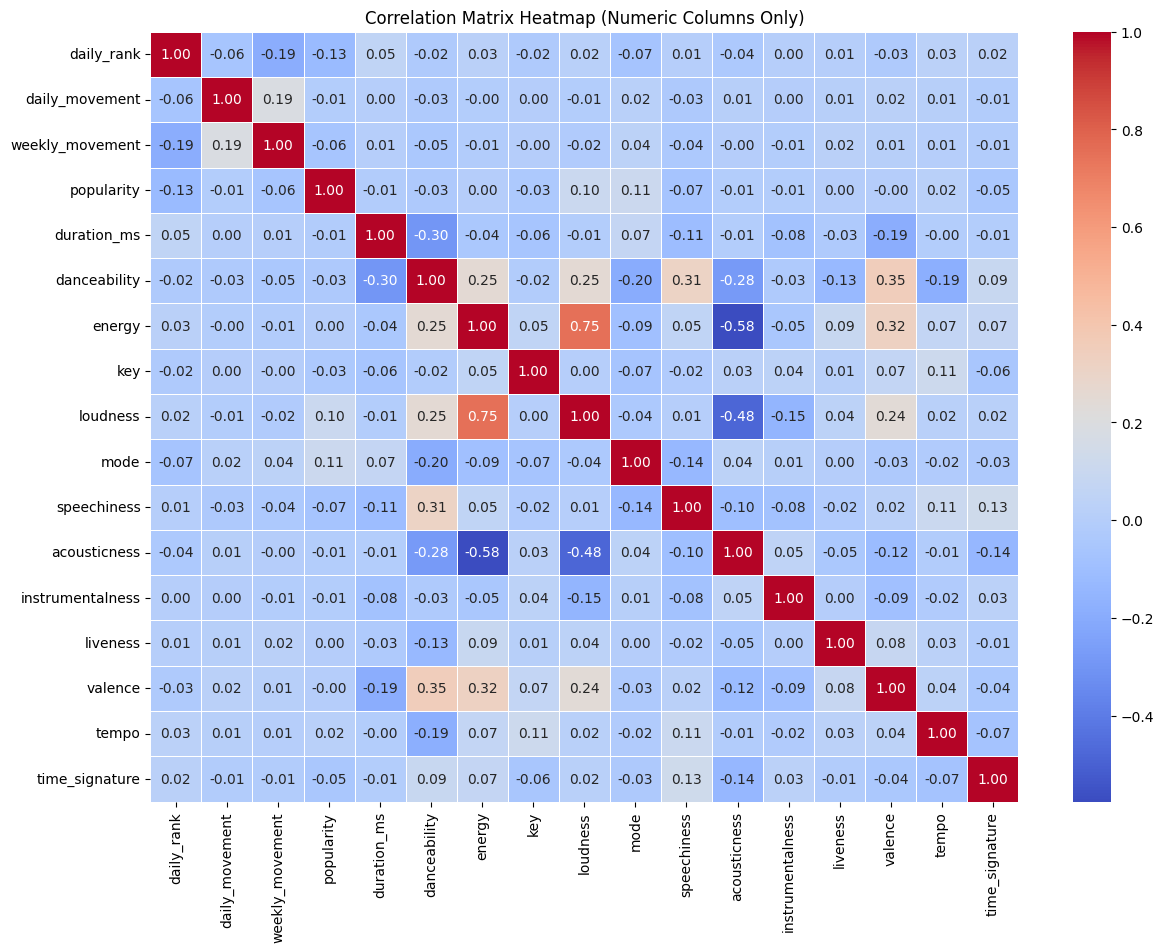

In [331]:
# Select only numeric columns
numeric_df1 = df1.select_dtypes(include=['number'])# converting string into numerical data type.

# Calculate the correlation matrix
correlation_matrix = numeric_df1.corr()

# Create a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap (Numeric Columns Only)')
plt.show()



Observation:
    
>Darker colors on the heatmap indicate stronger correlations (either positive or negative),
while lighter colors indicate weaker or no correlations.

>Focusing on the extreme values (close to 1[positive correlation] or -1[negative correlation]) for strong correlations.

Popularity distribution by category

In [332]:
for column in df1.columns:
    print(df1.groupby(column)['popularity'].mean())


spotify_id
000n6Lx4yqUAslF1x3JeFY    62.000000
001TLpmtuQMWJYyE7q9ayM    33.000000
003vvx7Niy0yvhvHt4a68B    87.965217
006oGnrSZevqZTimsD2oh4    76.157895
00E0Z2jrF7reoHps4zcbWQ    81.000000
                            ...    
7z8EC940EnKqsHQGz5NwEe    44.000000
7zTFcEEtyeKxvRUrPIHT49    54.272727
7zcmeZ4Xt54ICq90anFSXq    77.404762
7znHeSOkpkYNF3FhiHwFta    37.500000
7zogy2wgR1sOBYLx9ouhcq    62.166667
Name: popularity, Length: 4664, dtype: float64
name
"Slut!" (Taylor's Version) (From The Vault)                  89.653543
#Sarkanbaltsarkanais                                         38.000000
$AD BOYZ II                                                  82.000000
&ME                                                          39.157895
(Don't Fear) The Reaper                                      80.000000
                                                               ...    
é¢¨é¨ä¸æ¹ (é»å½±ãé¿åª½æåç¬¬äºåãä¸»é¡æ²)    63.338710
é£é¸åè                                

 calculated the average popularity for songs grouped by Spotify ID,song name,artists,daily rank,daily movement,weekly movement,country ,duration ,album name
    

Distribution Visualisation.

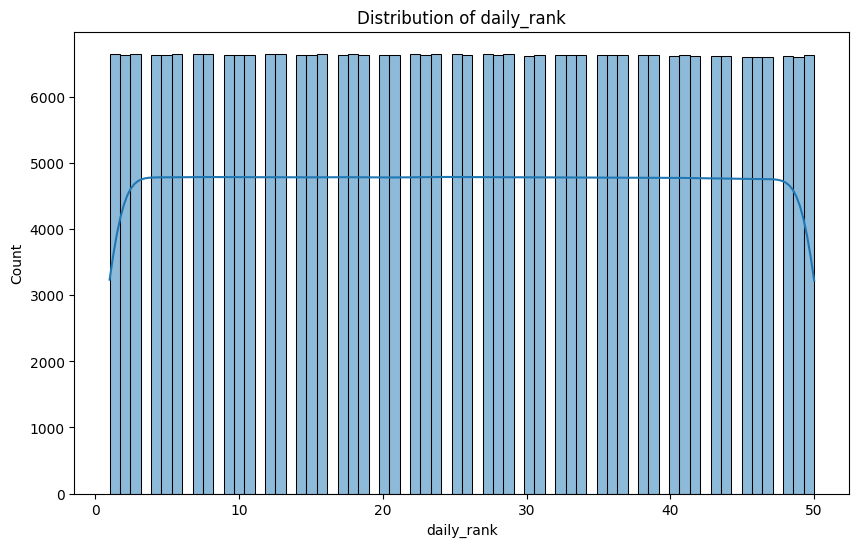

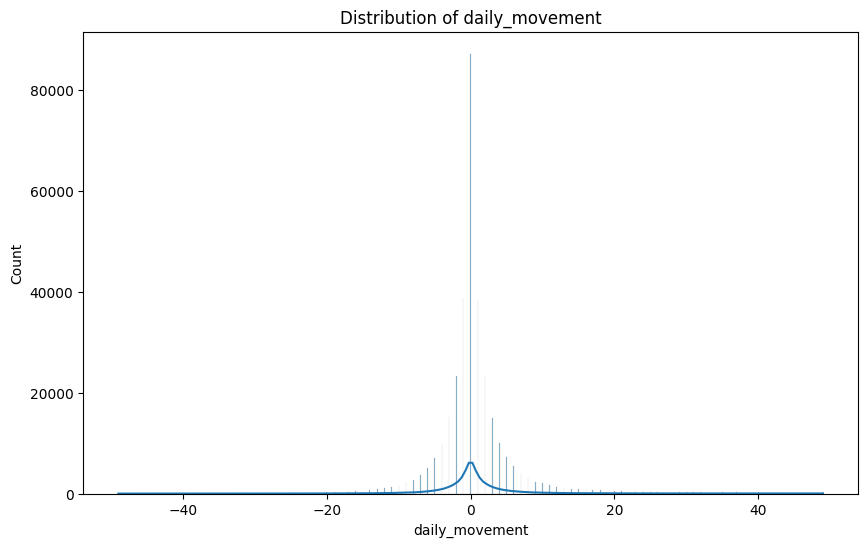

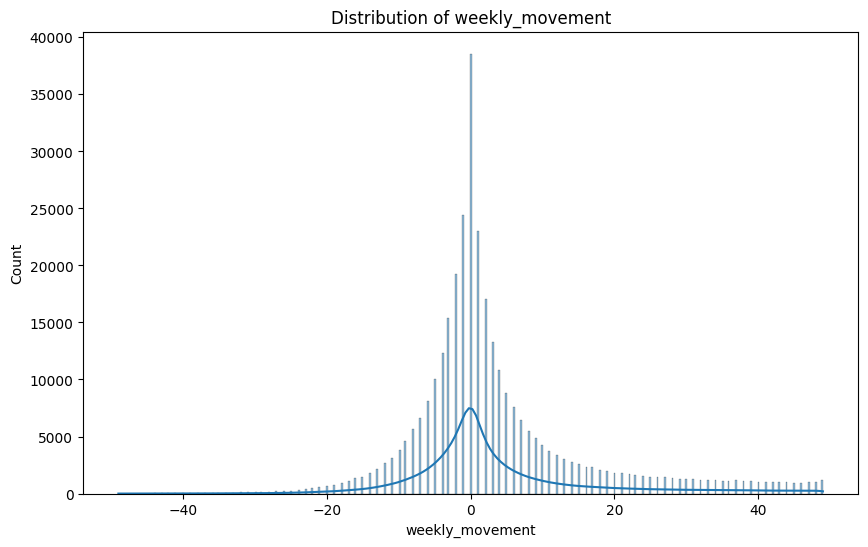

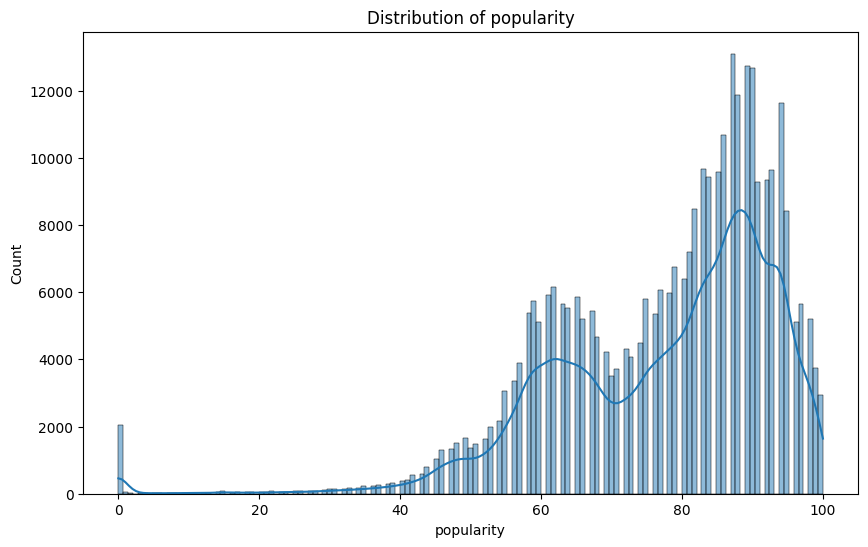

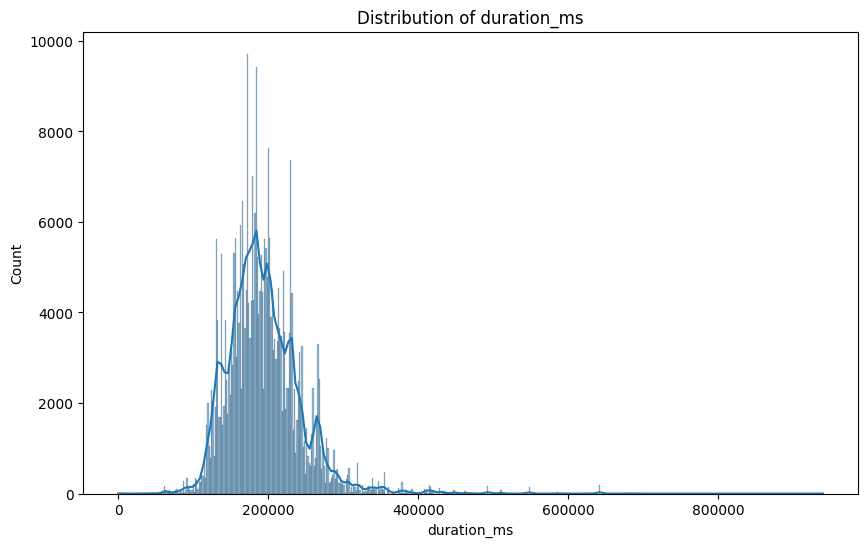

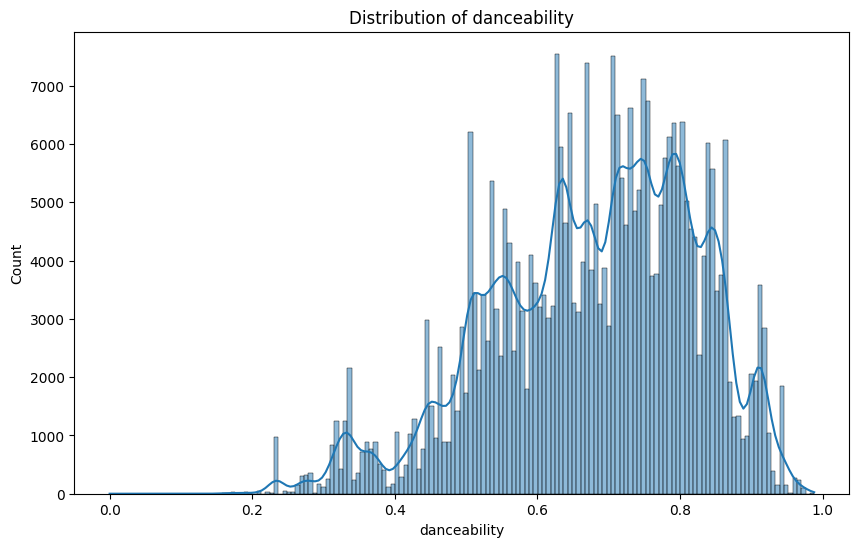

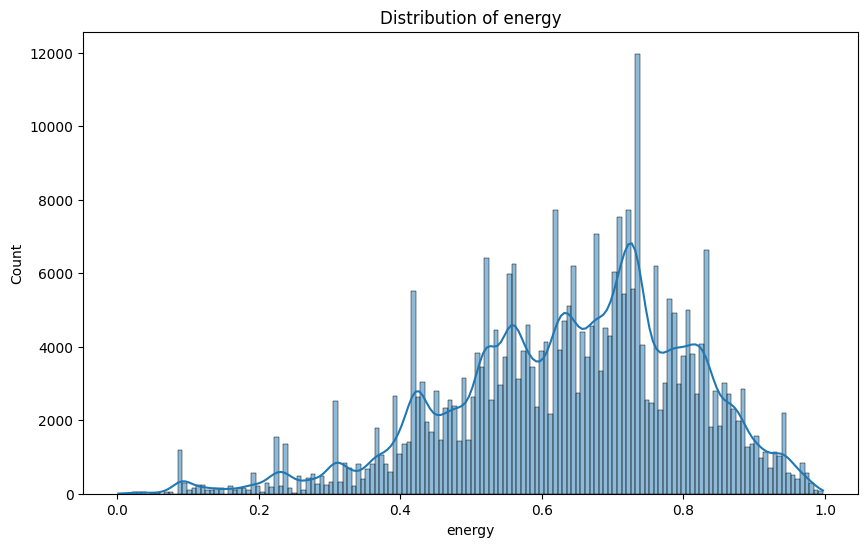

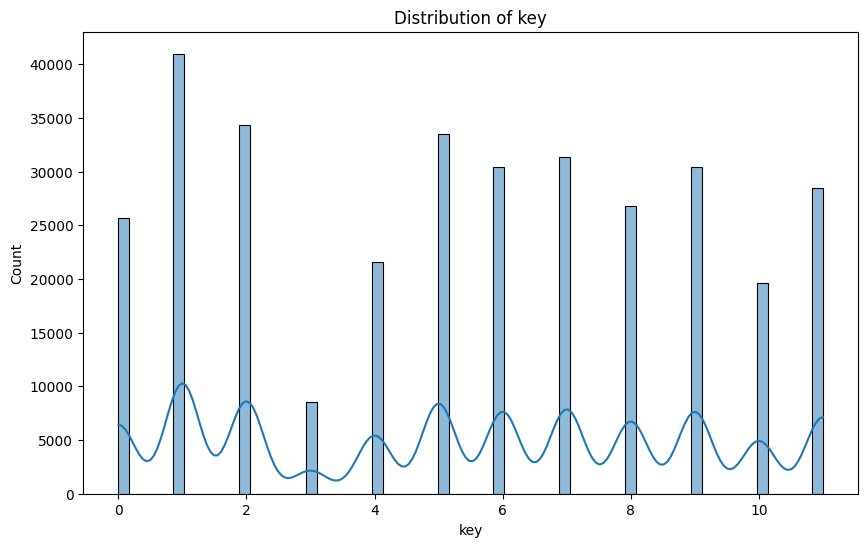

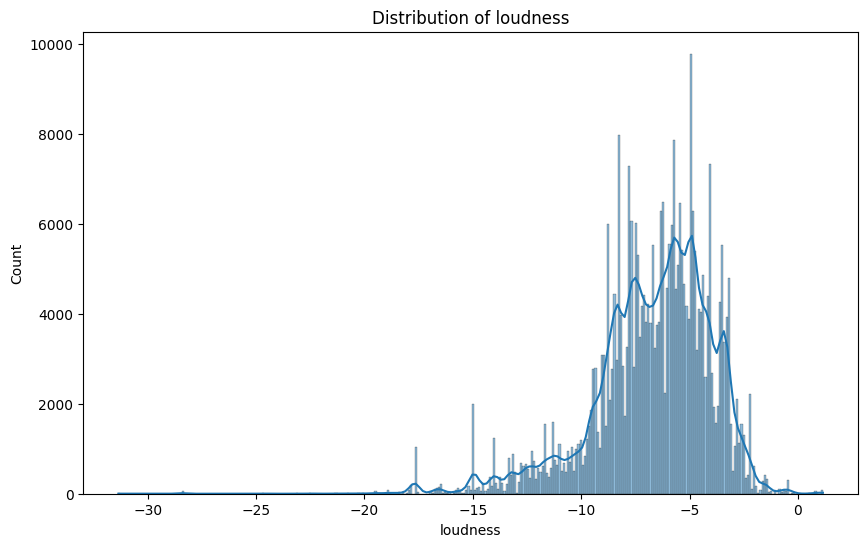

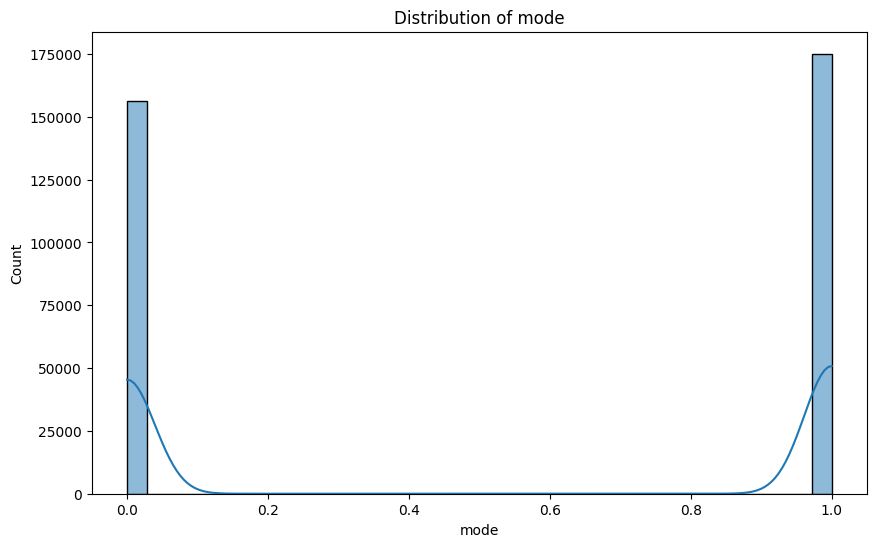

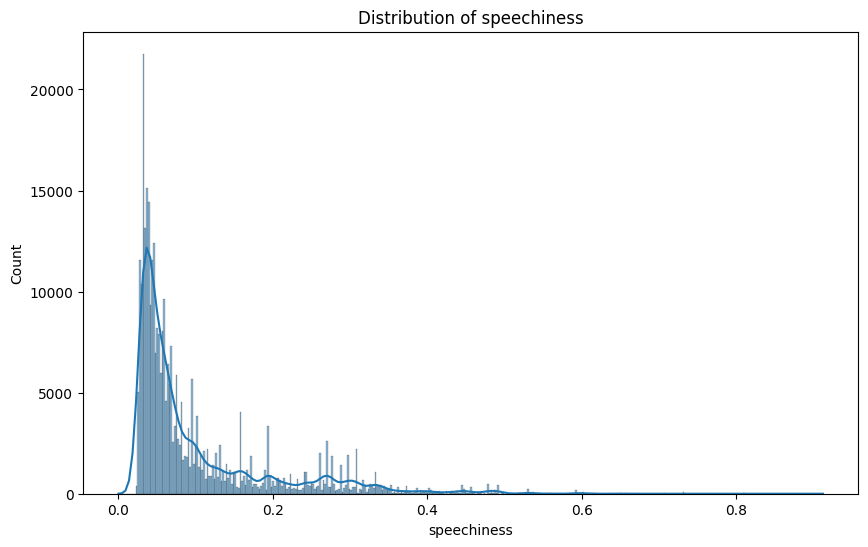

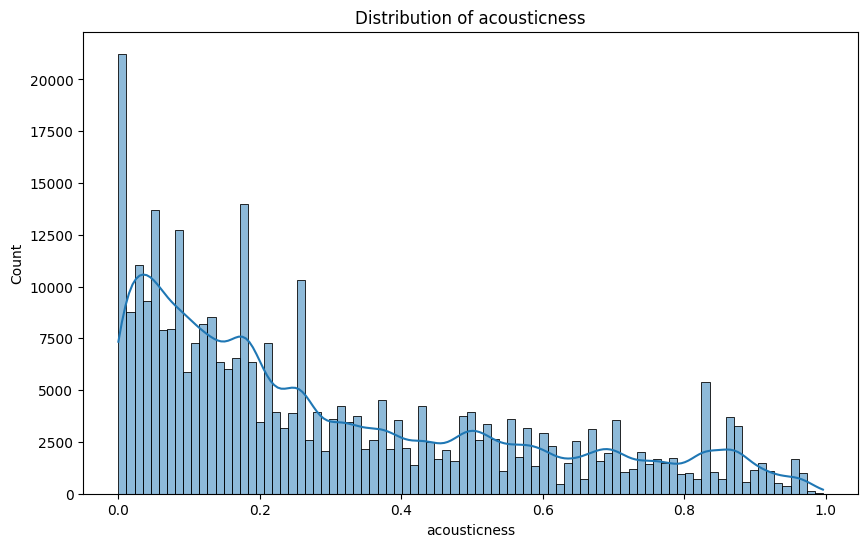

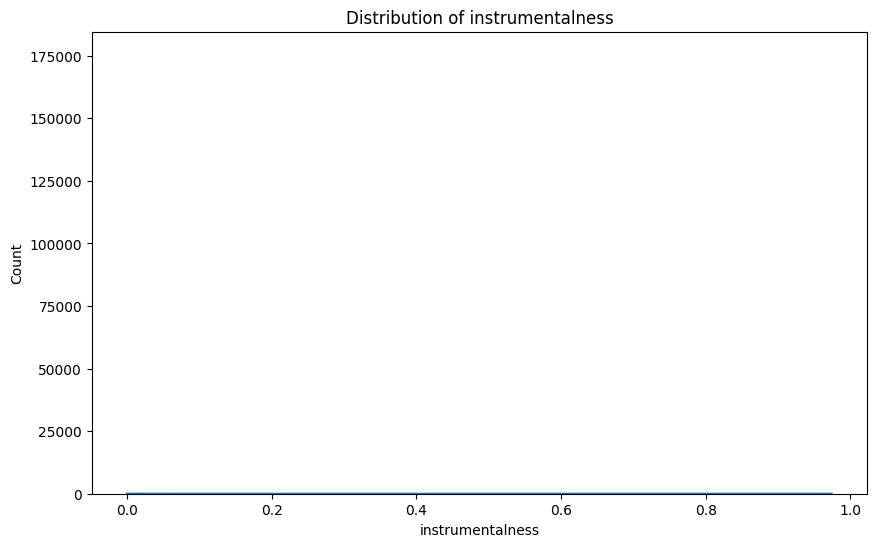

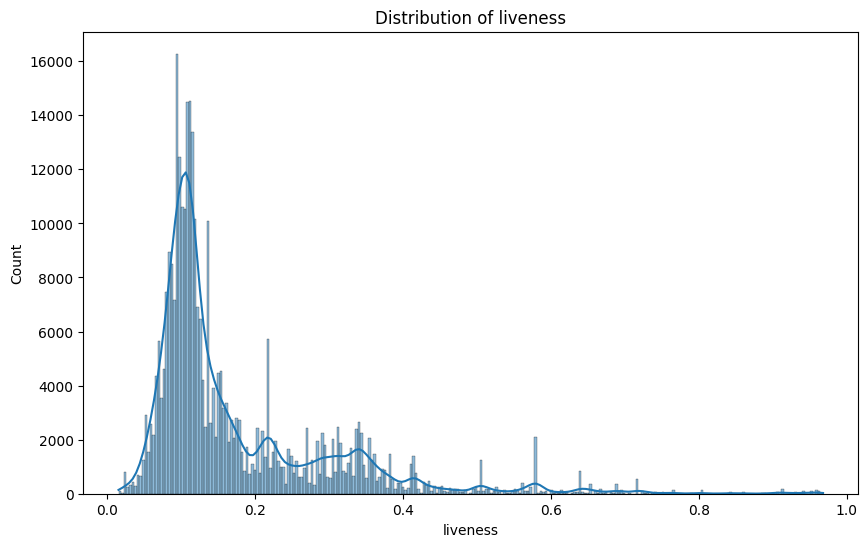

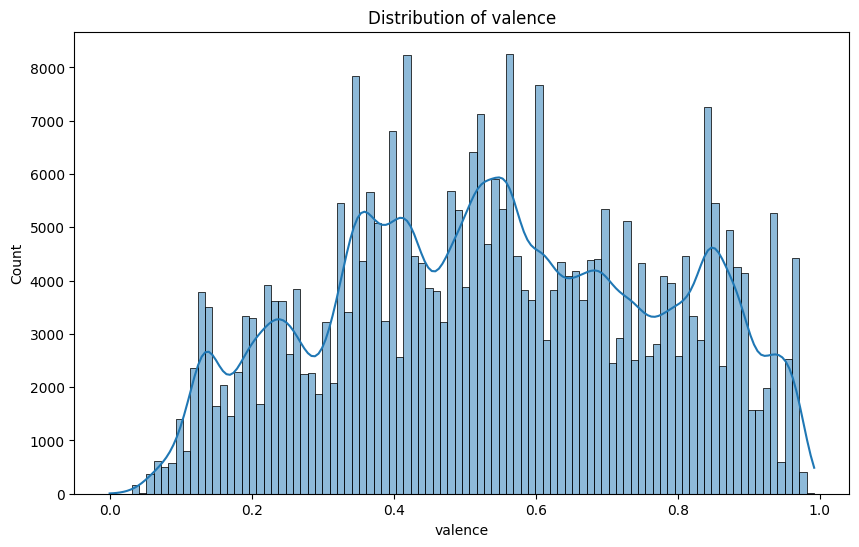

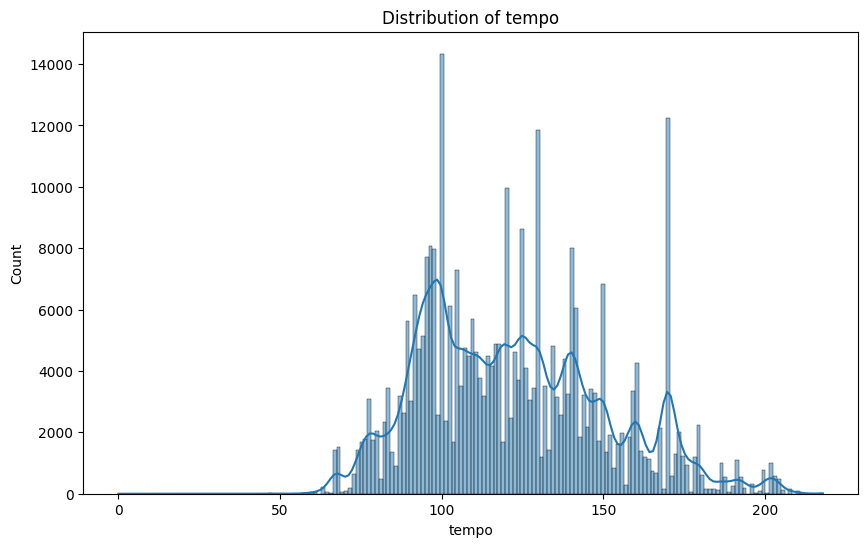

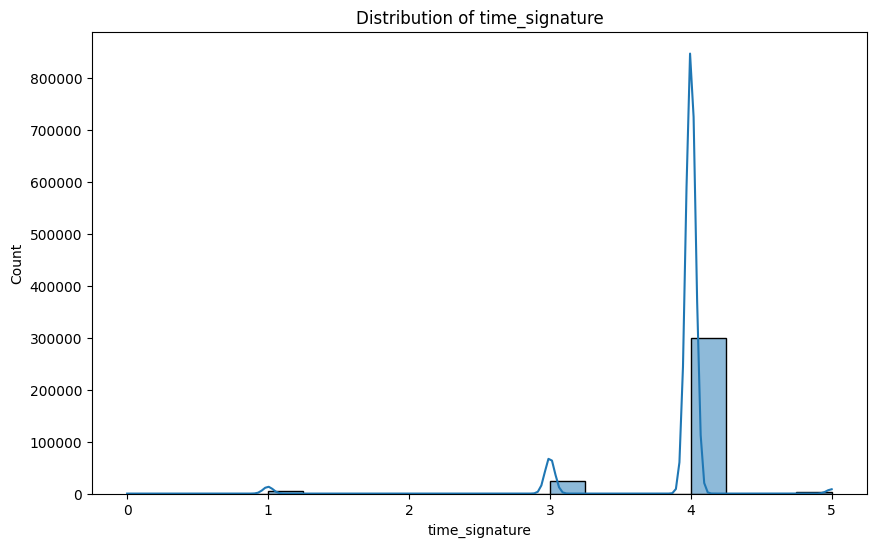

In [333]:
numeric_columns = df1.select_dtypes(include=['float64', 'int64']).columns# this function is used to select the data frame based on they are data types
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)# histogram with the help of kernel density.
    plt.title(f'Distribution of {col}')
    plt.show()


 Univariate Analysis

<ipython-input-334-59e8d6129327>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['popularity']);


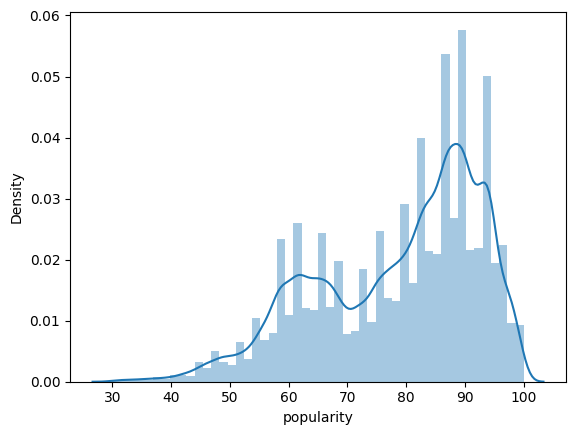

In [334]:
#Histogram
sns.distplot(df1['popularity']);

In [335]:
# skewnesss and kurtosis
print('skewness:%f' % df1['popularity'].skew())
print('kurtosis:%f' % df1['popularity'].kurt())

skewness:-0.662806
kurtosis:-0.438068


In [336]:
# standarsing the data
#new_df['popularity'].values converts the 'popularity' column to a numpy array
popularity_column = df1['popularity'].values.reshape(-1, 1)#reshape(-1, 1) converts the 1D array to a 2D array
popularity_scale = StandardScaler().fit_transform(popularity_column)
low_range=popularity_scale[popularity_scale[:,0].argsort()][:10]#argsort used to sort first 10 low range values and
high_range=popularity_scale[popularity_scale[:,0].argsort()][-10:]# sorts the last  10 rows high range values.
print('outer range(low) of the distribution:')
print(low_range)
print('\outer range(high) of the distribution:')
print(high_range)





outer range(low) of the distribution:
[[-3.527388]
 [-3.527388]
 [-3.527388]
 [-3.527388]
 [-3.527388]
 [-3.527388]
 [-3.527388]
 [-3.527388]
 [-3.527388]
 [-3.527388]]
\outer range(high) of the distribution:
[[1.54555214]
 [1.54555214]
 [1.54555214]
 [1.54555214]
 [1.54555214]
 [1.54555214]
 [1.54555214]
 [1.54555214]
 [1.54555214]
 [1.54555214]]


Note:
    above 2 execution is to show the difference
    
    [-10:]: this extracts the last 10 rows of the sorted popularity_scale, which corresponds to the highest 10 values in the standardized 'popularity' column.
    
    
    popularity_scale[popularity_scale[:, 0].argsort()]: This rearranges the rows of popularity_scale based on the sorted indices. As a result, popularity_scale is sorted in ascending order based on the first column.

Bivariate analysis

<Axes: xlabel='daily_movement', ylabel='popularity'>

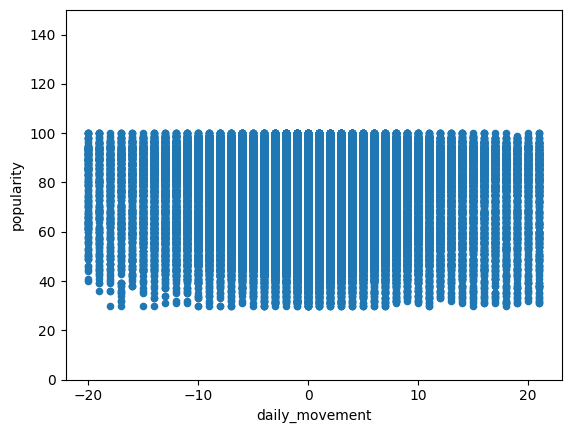

In [337]:
# bivariate analysis for popularity and daily_movement
var='daily_movement'
data=pd.concat([df1['popularity'],df1[var]],axis=1)
data.plot.scatter(x=var,y='popularity',ylim=(0,150))

Top 10 most popular artists

In [338]:
artists_count=df1['artists'].value_counts().head(10)
artists_count

Taylor Swift        5878
Doja Cat            3729
KAROL G             2870
Kenya Grace         2726
iÃ±igo quintero     2667
Bad Bunny           2653
Feid                2569
Dua Lipa            2035
Jung Kook           2009
Bizarrap, Milo j    1969
Name: artists, dtype: int64

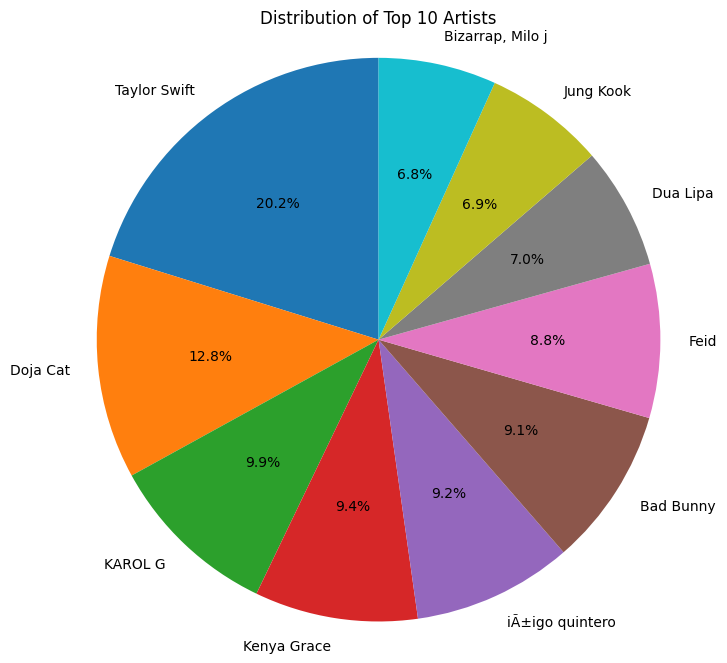

In [339]:
# Count the occurrences of each artist
artists_counts = df1['artists'].value_counts()

# Select the top 10 artists
top_10_artists = artists_counts.head(10)

# Plotting the pie chart for the top 10 artists
plt.figure(figsize=(8, 8))
plt.pie(top_10_artists, labels=top_10_artists.index, autopct='%1.1f%%',startangle=90)

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title('Distribution of Top 10 Artists')

# Display the pie chart
plt.show()


In [340]:
# similarly for least 10
artists_count=df1['artists'].value_counts().tail(10)
artists_count

Zahara, Georgy                                                 1
Hassa1, Flack                                                  1
Immune, Misk                                                   1
Sachet Tandon, Parampara Tandon, Sachet-Parampara              1
Orochi, Caio Luccas, Pedro Lotto, Mainstreet, Galdino, Ribb    1
SHON                                                           1
Malte August                                                   1
Fhany Santin, Natan & Shander                                  1
Yorik Ben David                                                1
Marka Akme, Migrantes, Lauty Gram, DJ Tao, Peipper             1
Name: artists, dtype: int64

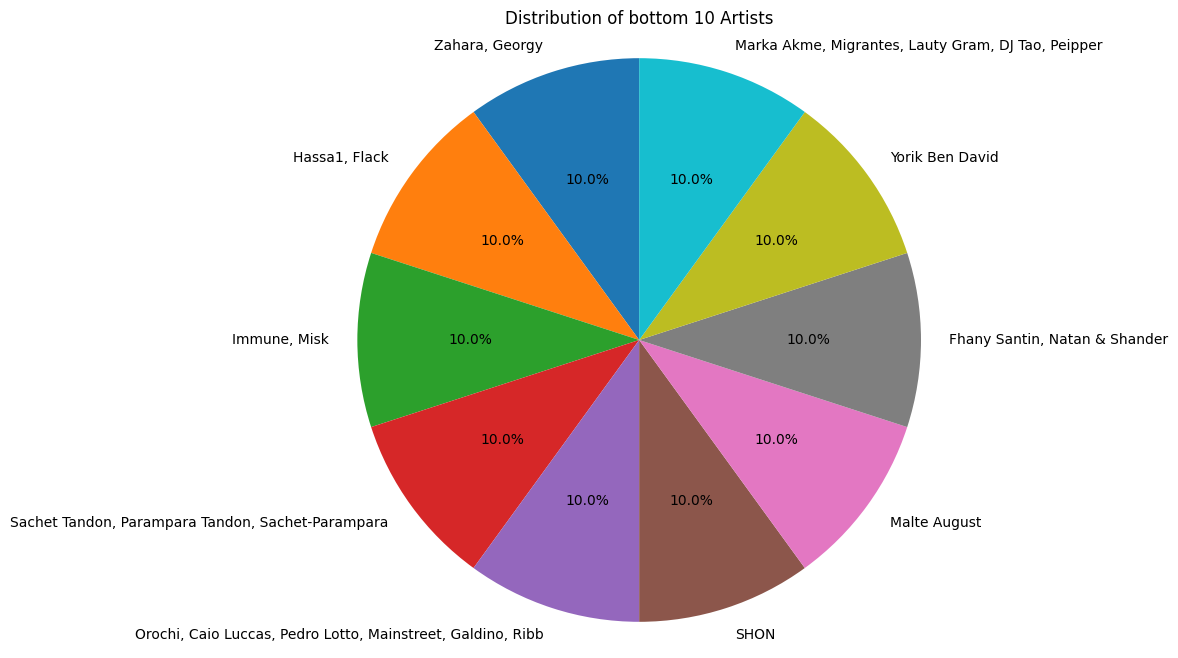

In [341]:
# Select the bottom 10 artists
top_10_artists = artists_counts.tail(10)

# Plotting the pie chart for the top 10 artists
plt.figure(figsize=(8, 8))
plt.pie(top_10_artists, labels=top_10_artists.index, autopct='%1.1f%%',startangle=90)

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title('Distribution of bottom 10 Artists')

# Display the pie chart
plt.show()


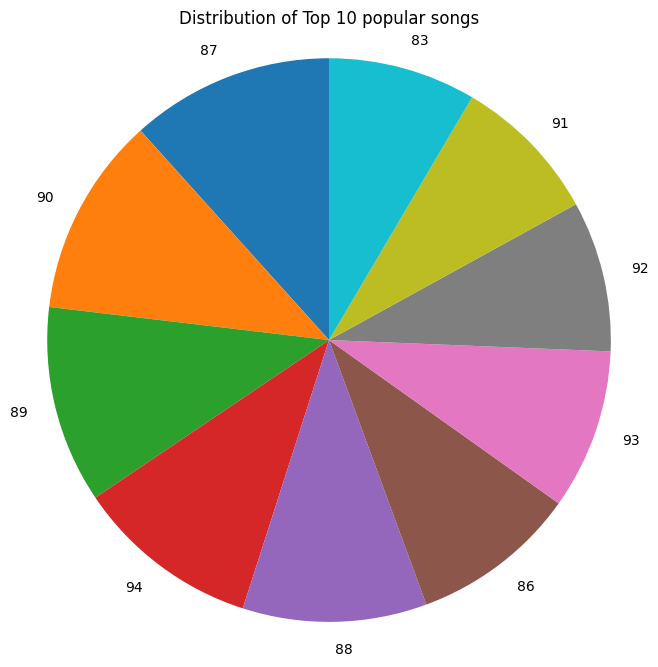

In [342]:
# Count the top 10 popular songs
popular_songs= df1['popularity'].value_counts()


# Select the top popular songs
top_10_popular_songs = popular_songs.head(10)

# Plotting the pie chart for the top 10 artists
plt.figure(figsize=(8, 8))
plt.pie(top_10_popular_songs, labels=top_10_popular_songs.index, startangle=90)

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title('Distribution of Top 10 popular songs')

# Display the pie chart
plt.show()


Album wise song distribution.

In [343]:
popular_albums= df1['album_name'].value_counts()
popular_albums

nadie sabe lo que va a pasar maÃ±ana     7170
Scarlet                                  3729
GOLDEN                                   3661
El Comienzo                              3361
MAÃANA SERÃ BONITO (BICHOTA SEASON)    3302
                                         ... 
BALLAS 2                                    1
Laadla                                      1
Nada Con Vos                                1
COMO ANTES                                  1
PAISA                                       1
Name: album_name, Length: 3566, dtype: int64

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


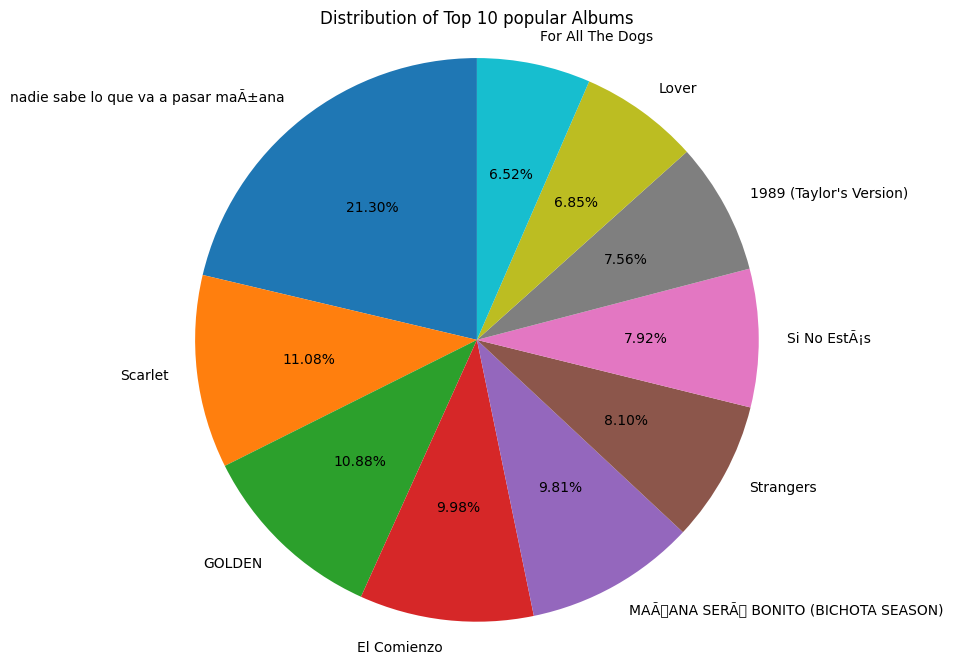

In [344]:
# Count the top 10 popular songs
popular_albums= df1['album_name'].value_counts()


# Select the top popular songs
top_10_popular_albums = popular_albums.head(10)

# Plotting the pie chart for the top 10 artists
plt.figure(figsize=(8, 8))
plt.pie(top_10_popular_albums, labels=top_10_popular_albums.index,autopct='%1.2f%%', startangle=90)# 1.2 represents percentage upto 2 decimals.

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title('Distribution of Top 10 popular Albums')

# Display the pie chart
plt.show()

Finding the most popular and least popular songs and visualisation.

In [345]:
# Top 10 most popular songs
top_10_most_popular = df1.groupby('name')['popularity'].max().nlargest(10).reset_index()

print("Top 10 Most Popular Songs:")
print(top_10_most_popular[['name', 'popularity']])


# Top 10 least popular songs
top_10_least_popular = df1.nsmallest(10, 'popularity').drop_duplicates(subset='name')

print("\nTop 10 Least Popular Songs:")
print(top_10_least_popular[['name', 'popularity']])



Top 10 Most Popular Songs:
                                  name  popularity
0      All I Want for Christmas Is You         100
1                         Cruel Summer         100
2                          Lovin On Me          99
3                My Love Mine All Mine          99
4                         Si No EstÃ¡s          99
5                                 LALA          98
6    Rockin' Around The Christmas Tree          98
7  Seven (feat. Latto) (Explicit Ver.)          98
8                 Standing Next to You          98
9                            Strangers          98

Top 10 Least Popular Songs:
                      name  popularity
10539       ÐÐ¾Ð»Ð³Ð¾ÑÐ°          30
10540       ÐÐµÑÑÐ½Ð¸Ðº          30
15333        ÙÙ Ø£Ø­Ø¨Ù          30
32530       ÐÐ°Ð´ÐµÐ¶Ð´Ð°          30
38666    ahogy Ã¶regszÃ¼nk          30
39250           Na Contigo          30
53710         mitte kuskil          30
63134  La NiÃ±a Consentida          30
65378              Alcohol      

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 132 (\x84) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.pri

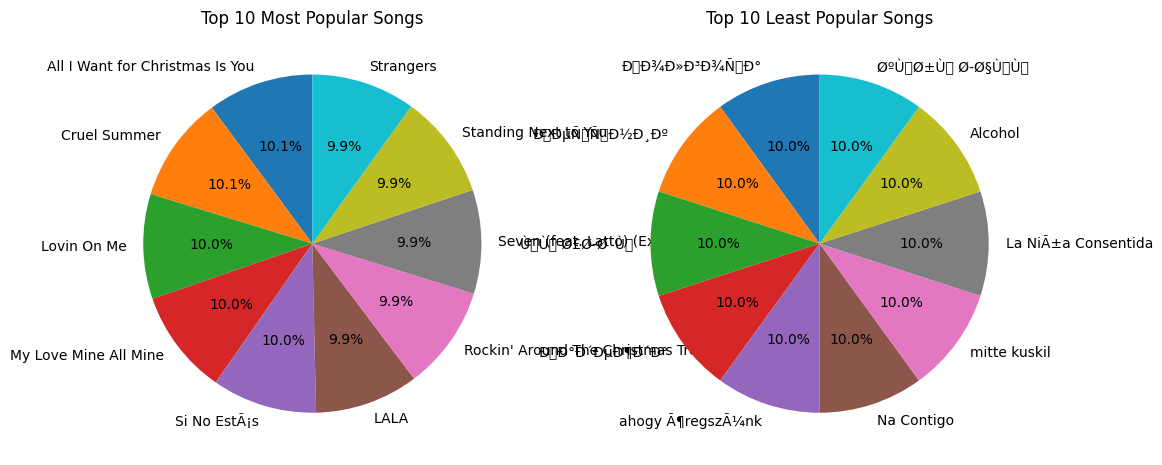

In [346]:
# Plotting the pie chart
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for top 10 most popular songs
axes[0].pie(top_10_most_popular['popularity'], labels=top_10_most_popular['name'], autopct='%1.1f%%', startangle=90)
axes[0].set_title('Top 10 Most Popular Songs')

# Pie chart for top 10 least popular songs
axes[1].pie(top_10_least_popular['popularity'], labels=top_10_least_popular['name'], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Top 10 Least Popular Songs')

plt.show()


Visualisation using bar graph

<ipython-input-347-e61ae5d231f3>:18: UserWarning: Glyph 147 (\x93) missing from current font.
  plt.tight_layout()
<ipython-input-347-e61ae5d231f3>:18: UserWarning: Glyph 132 (\x84) missing from current font.
  plt.tight_layout()
<ipython-input-347-e61ae5d231f3>:18: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.tight_layout()
<ipython-input-347-e61ae5d231f3>:18: UserWarning: Glyph 129 (\x81) missing from current font.
  plt.tight_layout()
<ipython-input-347-e61ae5d231f3>:18: UserWarning: Glyph 130 (\x82) missing from current font.
  plt.tight_layout()
<ipython-input-347-e61ae5d231f3>:18: UserWarning: Glyph 131 (\x83) missing from current font.
  plt.tight_layout()
<ipython-input-347-e61ae5d231f3>:18: UserWarning: Glyph 157 (\x9d) missing from current font.
  plt.tight_layout()
<ipython-input-347-e61ae5d231f3>:18: UserWarning: Glyph 138 (\x8a) missing from current font.
  plt.tight_layout()
<ipython-input-347-e61ae5d231f3>:18: UserWarning: Glyph 136 (\x88) missing from 

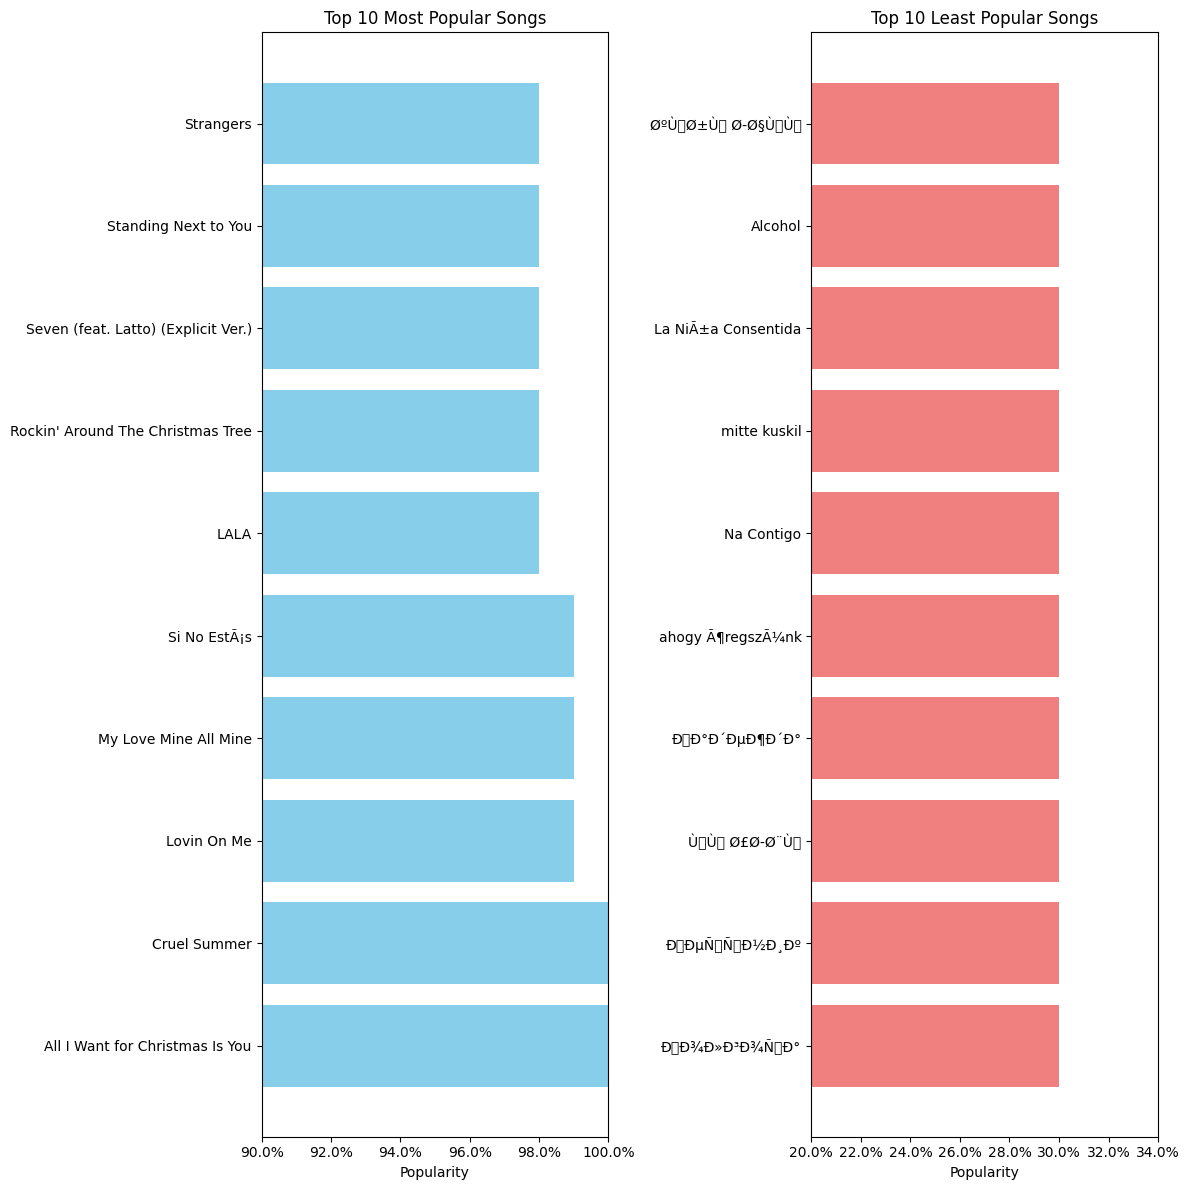

In [347]:
# Plotting the horizontal bar chart
fig, axes = plt.subplots(1, 2, figsize=(12, 12))

# Horizontal bar chart for top 10 most popular songs
axes[0].barh(top_10_most_popular['name'], top_10_most_popular['popularity'], color='skyblue')
axes[0].set_title('Top 10 Most Popular Songs')
axes[0].set_xlabel('Popularity')
axes[0].set_xlim(90, 100)
axes[0].xaxis.set_major_formatter(PercentFormatter())# used to get xaxis label in %.

# Horizontal bar chart for top 10 least popular songs
axes[1].barh(top_10_least_popular['name'], top_10_least_popular['popularity'], color='lightcoral')
axes[1].set_title('Top 10 Least Popular Songs')
axes[1].set_xlabel('Popularity')
axes[1].set_xlim(20, 34)
axes[1].xaxis.set_major_formatter(PercentFormatter())

plt.tight_layout()
plt.show()


pair plots

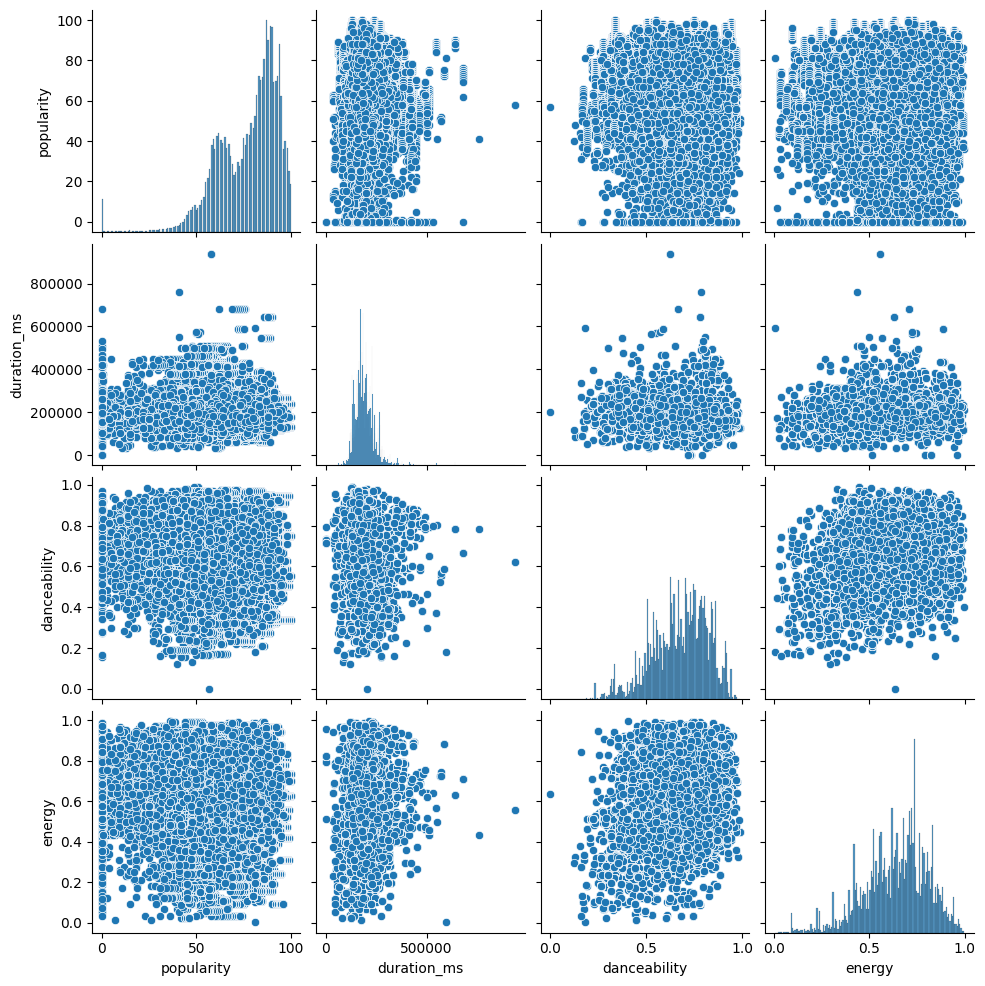

In [348]:
sns.pairplot(df[['popularity', 'duration_ms', 'danceability', 'energy']])
plt.show()

Categorical Feature Analysis

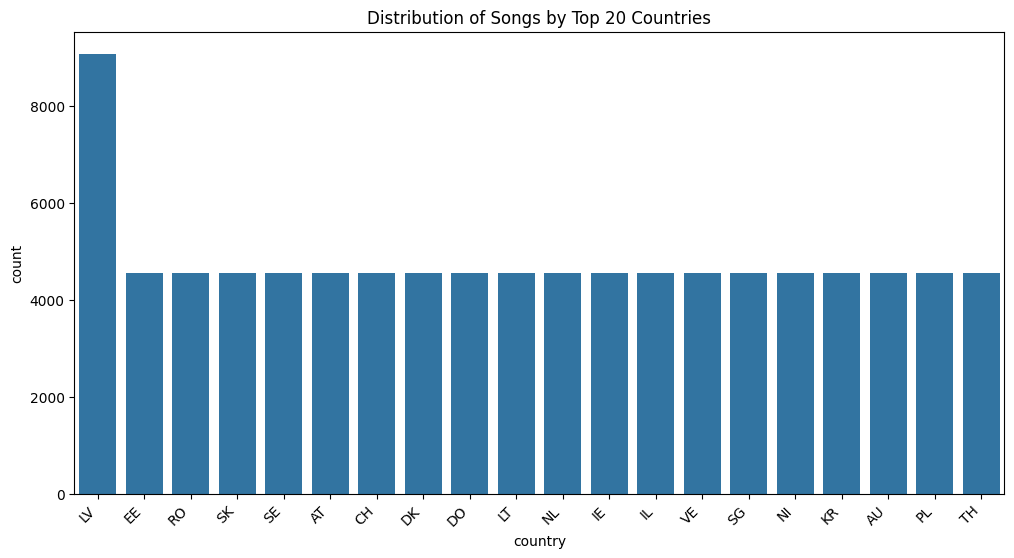

In [349]:
#  top 20 countries
top_countries = df['country'].value_counts().nlargest(20).index

# Filter the DataFrame for only the top 20 countries
df_top_countries = df[df['country'].isin(top_countries)]

# Plot the countplot for the top 20 countries
plt.figure(figsize=(12, 6))
sns.countplot(x='country', data=df_top_countries, order=top_countries)
plt.title('Distribution of Songs by Top 20 Countries')
plt.xticks(rotation=45, ha='right')
plt.show()

Feature Extraction

In [350]:
# Extracting audio features
audio_features = df1[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                      'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
print('Audio Features=\n',audio_features)

# Extracting textual features
textual_features = df1[['name', 'artists', 'album_name', 'country']]
print('Textual Features=\n',textual_features)

# Extracting temporal features
temporal_features = df1[['snapshot_date', 'duration_ms', 'album_release_date']]
print('Temporal Features=\n',temporal_features)

# Concatenating all extracted features
extracted_features = pd.concat([audio_features, textual_features, temporal_features], axis=1)

# Display the resulting DataFrame with extracted features
print('Exrtacted Features=\n',extracted_features.head())


Audio Features=
         danceability  energy  key  loudness  mode  speechiness  acousticness  \
1              0.751   0.819   11    -4.372     0       0.0409        0.2550   
3              0.504   0.308    9   -14.958     1       0.0321        0.8680   
4              0.522   0.641    8    -6.287     1       0.0318        0.0545   
5              0.943   0.558    2    -4.911     1       0.0568        0.0026   
6              0.552   0.702    9    -5.707     1       0.1570        0.1170   
...              ...     ...  ...       ...   ...          ...           ...   
331611         0.483   0.408    5    -9.243     0       0.0502        0.5080   
331612         0.773   0.635   10    -5.060     1       0.0452        0.0585   
331613         0.573   0.422   10    -7.621     0       0.0678        0.5510   
331614         0.633   0.454    9    -8.016     0       0.0875        0.7390   
331615         0.638   0.717    8    -5.804     1       0.0375        0.0010   

        instrumentalne

Observation:
    
Audio Features:

>The danceability values range widely, suggesting a mix of dance-friendly and less danceable songs in the dataset.

>Energy values vary, indicating a diverse set of songs with different levels of intensity.

>Songs span various keys, loudness levels, and tempos, reflecting a rich musical landscape.

>The instrumentalness values show a mix of instrumental and vocal-centric tracks.

Textual Features:

>The dataset includes a wide array of songs, from "La Diabla" by Xavi to "Cruel Summer" by Taylor Swift, showcasing diversity in genres and artists.

>Songs are associated with different albums and countries, highlighting a global representation of music.

Temporal Features:

>Snapshot dates indicate the dataset captures music popularity at different time points.

>The duration of songs varies, indicating a mix of short and long tracks.

>Album release dates span different years, suggesting a collection of both recent and older music.

Extracted Features:

>The consolidated dataset provides a comprehensive view, combining audio characteristics, textual details, and temporal aspects for each song.

>This integrated dataset is valuable for holistic analysis, enabling correlations between audio features, textual information, and temporal trends.

Additional Insights:

>The dataset showcases the dynamic nature of the music industry, with songs released over a range of years and countries.

>Popularity trends can be explored over different snapshot dates, offering insights into the temporal dynamics of music preferences.

SUMMARY

Data Preprocessing:
>Imported necessary library packages.

>Read the dataset.

>Identified and handled missing values using the fillna method.

Descriptive Statistics and Outlier Removal:

>Calculated skewness and kurtosis.

>Removed outliers using Z-score.

>Described the statistics of numerical columns and performed some statistics test.

Correlation Matrix:

>Created a correlation matrix for numerical features.

>Visualized the correlation matrix using a heatmap.

Population Distribution:

>Analyzed population distribution by categories.

Distribution Visualization:

>Visualized distribution for different features.

Univariate and Bivariate Analysis for Popularity:

>Analyzed univariate and bivariate statistics for the popularity feature.

Top and Bottom 10 Artists, Albums, and Songs:

>Identified the top and bottom 10 artists, albums, and songs.

>Visualized the results using pie charts.

Pair Plot Analysis:

>Created a pair plot for the features: population, duration_ms, danceability, and energy.
    
Categorical Feature Analysis:

>Analyzed categorical features, especially the 'country' feature.

Feature Extraction:
>Extracted relevant features from the dataset.


MODEL BUILDING: MUSIC RECOMMENDATION SYSTEM.

Collaborative filtering model:

In [13]:
# it is designed for building and analyzing recommender systems

!pip install scikit-surprise


In [14]:
# It is printing the unique artist names present in the 'artists' column of the DataFrame df1.

unique_artists = df1['artists'].unique()
print(unique_artists)


['Xavi' 'Mitski' 'The Weeknd, JENNIE, Lily-Rose Depp' ... 'Dirty Harry'
 'Nino Xypolitas' 'Marka Akme, Migrantes, Lauty Gram, DJ Tao, Peipper']


In [15]:
# Imported the required libraries for the dataset further steps

from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate


# SVD is a matrix factorization technique often used in collaborative filtering-based recommender systems.
from surprise import SVD

from surprise import accuracy

# The dump module is used to save and load models.
from surprise import dump

In [16]:
# Function to make recommendations for a given user /
def get_recommendations(user_id, model, df):
    items_interacted = df[df['spotify_id'] == user_id]['name'].tolist()
    recommendations = []

    for item_id in df['name'].unique():
        if item_id not in items_interacted:
            prediction = model.predict(user_id, item_id)
            recommendations.append((item_id, prediction.est))

    recommendations.sort(key=lambda x: x[1], reverse=True)
    return recommendations[:10]

In [17]:
# Load data into Surprise Dataset
reader = Reader(rating_scale=(0, 1000))
data = Dataset.load_from_df(df1[['name', 'artists', 'popularity']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.4, random_state=25000)

# Build a collaborative filtering model (using SVD as an example)
model = SVD()
model.fit(trainset)

# Make predictions on the test set
predictions = model.test(testset)

# Evaluate the model
rmse = accuracy.rmse(predictions)
print(f'RMSE: {rmse}')

RMSE: 3.1006
RMSE: 3.100568405121954


In [18]:
# Dump the model to a file for future use and here pkl is for saving and load the model
model_filename = 'collaborative_model.pkl'
dump.dump(model_filename, algo=model)

print('Collaborative filtering model trained and saved.')

Collaborative filtering model trained and saved.


Evaluating RMSE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    3.0763  3.0739  3.0932  3.0261  2.9898  3.0113  2.9676  2.9778  3.0904  3.0581  3.0365  0.0455  
Fit time          4.82    5.41    4.81    5.93    5.19    4.72    5.13    5.06    4.51    5.04    5.06    0.38    
Test time         0.44    0.54    0.33    0.31    0.33    0.26    0.55    0.33    0.35    0.33    0.38    0.09    


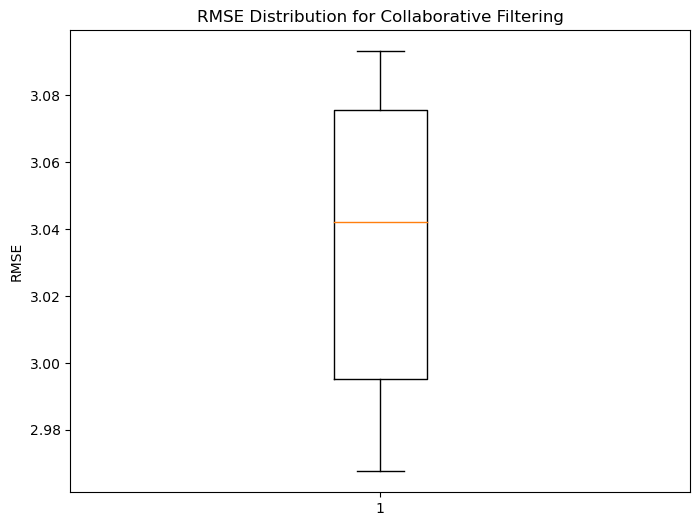


Top 10 Recommendations for User 0R6NfOiLzLj4O5VbYSJAjf:
1. Jungle - Predicted Rating: 79.52155456415512
2. Rihanna - Predicted Rating: 79.21012723997946
3. Nirvana - Predicted Rating: 78.83117097953908
4. My Love Mine All Mine - Predicted Rating: 78.65220354517841
5. One Of The Girls (with JENNIE, Lily Rose Depp) - Predicted Rating: 78.65220354517841
6. Lovin On Me - Predicted Rating: 78.65220354517841
7. Cruel Summer - Predicted Rating: 78.65220354517841
8. La VÃ­ctima - Predicted Rating: 78.65220354517841
9. redrum - Predicted Rating: 78.65220354517841
10. Stick Season - Predicted Rating: 78.65220354517841

Top 10 Recommendations for User 3rUGC1vUpkDG9CZFHMur1t:
1. Jungle - Predicted Rating: 79.52155456415512
2. Rihanna - Predicted Rating: 79.21012723997946
3. Nirvana - Predicted Rating: 78.83117097953908
4. La Diabla - Predicted Rating: 78.65220354517841
5. My Love Mine All Mine - Predicted Rating: 78.65220354517841
6. One Of The Girls (with JENNIE, Lily Rose Depp) - Predicted Rati

In [19]:
# Visualize RMSE values
cross_validate_results = cross_validate(model, data, measures=['RMSE'], cv=10, verbose=True)
rmse_values = cross_validate_results['test_rmse']

plt.figure(figsize=(8, 6))
plt.boxplot(rmse_values)
plt.title('RMSE Distribution for Collaborative Filtering')
plt.ylabel('RMSE')
plt.show()

# Load the trained collaborative filtering model
model_filename = 'collaborative_model.pkl'
_, loaded_model = dump.load(model_filename)

# Users for recommendations
user_ids = ['0R6NfOiLzLj4O5VbYSJAjf','3rUGC1vUpkDG9CZFHMur1t','05sO6FK8E9l2cfwnEUTjHq','56y1jOTK0XSvJzVv9vHQBK','2deIA64Gfsm50VTsKwrxnQ',
            '2KslE17cAJNHTsI2MI0jb2','2hn2zOA2XFlv6DSmesylrL','5XeFesFbtLpXzIVDNQP22n','52eIcoLUM25zbQupAZYoFh','0H9WU0OIXPpbOVgzzOanXb']

# Generate and print recommendations for each user
for user_id in user_ids:
    recommendations = get_recommendations(user_id, loaded_model, df1)

    print(f'\nTop 10 Recommendations for User {user_id}:')
    for idx, (item_id, predicted_rating) in enumerate(recommendations, 1):
        print(f'{idx}. {item_id} - Predicted Rating: {predicted_rating}')


# **Content-based filtering model**

In [370]:
# It is used for text feature extraction / to convert text data into numerical vectors for machine learning models.
from sklearn.feature_extraction.text import TfidfVectorizer

# It calculates the linear kernel between vectors.
from sklearn.metrics.pairwise import linear_kernel

import matplotlib.pyplot as plt

In [371]:
# Combine relevant textual features into a single column
df1.loc[:, 'text_features'] = df1['name'] + ' ' + df1['artists'] + ' ' + df1['album_name'] + ' ' + df1['country']

<ipython-input-371-a1a7c2e9ce80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, 'text_features'] = df1['name'] + ' ' + df1['artists'] + ' ' + df1['album_name'] + ' ' + df1['country']


In [372]:
# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df1['text_features'])

In [373]:
# Position of the user id's
song_indices = [1, 90, 180, 360, 450,540,630,720,810,900]

In [374]:
# Display top recommendations and visualizations for each index
for song_index in song_indices:
    # Compute the cosine similarity between the chosen song and all other songs
    cosine_similarities = linear_kernel(tfidf_matrix[song_index], tfidf_matrix).flatten()

    # Get the indices of songs sorted by similarity (excluding the chosen song itself)
    similar_songs = cosine_similarities.argsort()[:-1][::-1]

    # Display top recommendations
    top_recommendations = df1.iloc[similar_songs[:1]][['name', 'artists', 'popularity']]
    print(f'\nTop Recommendations for Song Index {song_index}:')
    print(top_recommendations)


Top Recommendations for Song Index 1:
                         name artists  popularity
295101  My Love Mine All Mine  Mitski          96

Top Recommendations for Song Index 90:
                                 name      artists  popularity
302609  Anh LÃ  Ngoáº¡i Lá» Cá»§a Em  PhÆ°Æ¡ng Ly          66

Top Recommendations for Song Index 180:
            name artists  popularity
269791  Una Foto  Mesita          82

Top Recommendations for Song Index 360:
                    name     artists  popularity
193777  AteÅe DÃ¼ÅtÃ¼m  Mert Demir          84

Top Recommendations for Song Index 450:
                      name                      artists  popularity
219266  EL AMOR DE SU VIDA  Grupo Frontera, Grupo Firme          90

Top Recommendations for Song Index 540:
                         name artists  popularity
262905  My Love Mine All Mine  Mitski          97

Top Recommendations for Song Index 630:
                       name    artists  popularity
22601  Standing Next to You  Ju

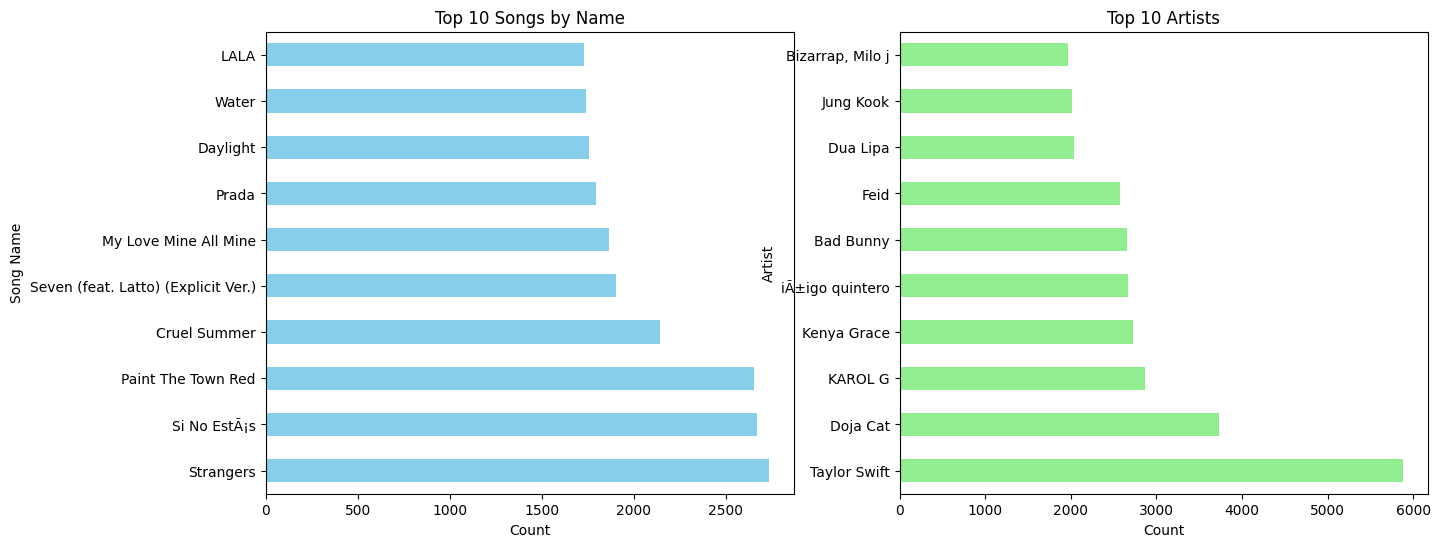

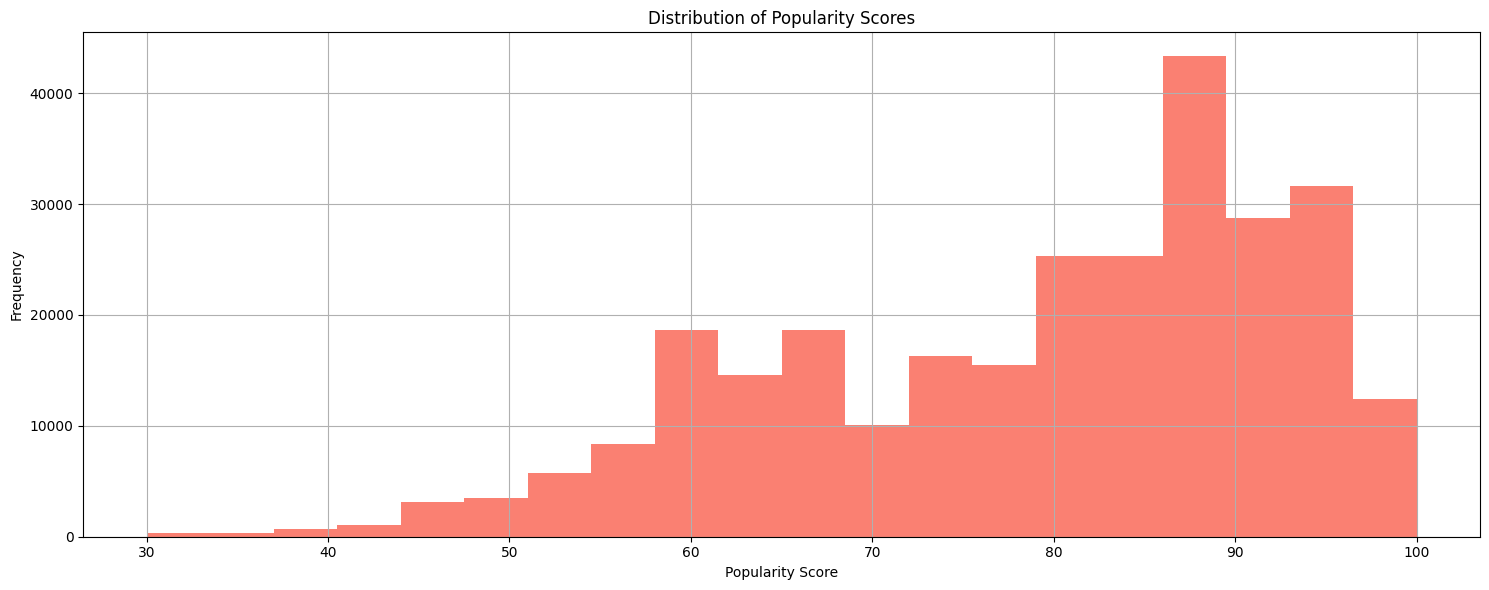

In [375]:
    # Visualization for 'name' and 'artists' horizontally
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Visualization for 'name'
    df1['name'].value_counts().nlargest(10).plot(kind='barh', ax=axes[0], color='skyblue')
    axes[0].set_title('Top 10 Songs by Name')
    axes[0].set_xlabel('Count')
    axes[0].set_ylabel('Song Name')

    # Visualization for 'artists'
    df1['artists'].value_counts().nlargest(10).plot(kind='barh', ax=axes[1], color='lightgreen')
    axes[1].set_title('Top 10 Artists')
    axes[1].set_xlabel('Count')
    axes[1].set_ylabel('Artist')

    # Create a new subplot for 'popularity'
    fig, ax_popularity = plt.subplots(figsize=(15, 6))

    # Visualization for 'popularity'
    df1['popularity'].hist(bins=20, ax=ax_popularity, color='salmon')
    ax_popularity.set_title('Distribution of Popularity Scores')
    ax_popularity.set_xlabel('Popularity Score')
    ax_popularity.set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()


The visualizations provide insights into the most popular songs, artists, and the overall distribution of popularity scores.
